In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# url = "https://dane.gov.pl/embed/resource/65513"
# df = pd.read_csv(url)

df = pd.read_csv("./liczba_uczniów_nie_są_obywat_polskimi_wg_statusu_typ_podm_30.09.2024.csv")

display(df.head())


,idTerytGmina,idTerytWojewodztwo,Wojewodztwo,Powiat,Gmina,Typ obszaru,idTypPodmiotu,Typ podmiotu,lb_ucz_cudzoziem_ogółem,"obywatel państwa członkowskiego UE, państwa członkowskiego EFTA lub Konfederacji Szwajcarskiej albo członek rodziny takiej osoby posiadający prawo pobytu lub prawo stałego pobytu",...,"osoba, której na terytorium RP udzielono zezwolenia na zamieszkanie na czas oznaczony w związku z okolicznością, o której mowa w art. 53 ust. 1 pkt 7, 13 i 14 ustawy o cudzoziemcach",członek rodziny osoby ubiegającej się o nadanie statusu uchodźcy,"osoba, której uprawnienie do nauki wynika z umowy międzynarodowej.",inny,"osoba, której udzielono zezwolenia na pobyt stały na terytorium RP","osoba, której udzielono zgody na pobyt ze względów humanitarnych, albo członek rodziny takiej osoby","osoba, której na terytorium RP udzielono zezwolenia na pobyt czasowy w związku z okolicznością, o której mowa w art. 127, art.159 ust. 1, art. 176 lub art. 186 ust. 1 pkt 3 lub 4 ustawy o cudzoziemcach","osoba, która posiada kartę pobytu z adnotacją ""dostęp do rynku pracy"", wizę Schengen lub wizę krajową wydaną w celu wykonywania pracy na terytorium RP",członek rodziny osoby ubiegającej się o udzielenie ochrony międzynarodowej,brak statusu w SIO
0,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,1,Przedszkole,102,2.0,...,NaN,NaN,NaN,34.0,9.0,NaN,3.0,NaN,NaN,1.0
1,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,3,Szkoła podstawowa,317,NaN,...,NaN,NaN,NaN,241.0,5.0,NaN,14.0,NaN,NaN,2.0
2,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,14,Liceum ogólnokształcące,45,1.0,...,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,6.0
3,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,16,Technikum,90,1.0,...,NaN,NaN,NaN,62.0,2.0,3.0,1.0,NaN,NaN,1.0
4,201011,2,DOLNOŚLĄSKIE,bolesławiecki,Bolesławiec,obszar miejski,19,Szkoła policealna,177,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,67.0,63.0,NaN,NaN


In [12]:
print(df.dtypes)

idTerytGmina                                                                                                                                                                                                   int64
idTerytWojewodztwo                                                                                                                                                                                             int64
Wojewodztwo                                                                                                                                                                                                   object
Powiat                                                                                                                                                                                                        object
Gmina                                                                                                                                               

In [15]:
print(df.columns)

Index(['idTerytGmina', 'idTerytWojewodztwo', 'Wojewodztwo', 'Powiat', 'Gmina',
       'Typ obszaru', 'idTypPodmiotu', 'Typ podmiotu',
       'lb_ucz_cudzoziem_ogółem',
       'obywatel państwa członkowskiego UE, państwa członkowskiego EFTA lub Konfederacji Szwajcarskiej albo członek rodziny takiej osoby posiadający prawo pobytu lub prawo stałego pobytu',
       'osoba pochodzenia polskiego w rozumieniu przepisów o repatriacji',
       'osoba, której udzielono zezwolenia na osiedlenie się na terytorium RP',
       'osoba posiadająca ważną Kartę Polaka',
       'osoba, której nadano status uchodźcy, albo członek rodziny takiej osoby',
       'osoba posiadająca zgodę na pobyt tolerowany',
       'osoba, której udzielono ochrony uzupełniającej, albo członek rodziny takiej osoby',
       'osoba korzystająca z ochrony czasowej na terytorium RP',
       'osoba, której na terytorium RP udzielono zezwolenia na pobyt rezydenta długoterminowego UE',
       'osoba, której na terytorium RP udzielon

In [16]:
print(df.isna().sum())

idTerytGmina                                                                                                                                                                                                    0
idTerytWojewodztwo                                                                                                                                                                                              0
Wojewodztwo                                                                                                                                                                                                     0
Powiat                                                                                                                                                                                                          0
Gmina                                                                                                                                                           

In [ ]:
# Zmieniamy kolumny z typami statusu na liczbowe (na wszelki wypadek)
status_cols = df.columns[9:]  # kolumny ze statusem pobytowym
df[status_cols] = df[status_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Dodajemy sumy statusów UE vs spoza UE jako nowe cechy
df['status_UE'] = df.iloc[:, 9]  # pierwsza kolumna to UE
df['status_pozostale'] = df[status_cols].sum(axis=1) - df['status_UE']

# Zamieniamy kategorie tekstowe na kody numeryczne
df['Typ podmiotu_kod'] = df['Typ podmiotu'].astype('category').cat.codes
df['Typ obszaru_kod'] = df['Typ obszaru'].astype('category').cat.codes
df['Wojewodztwo_kod'] = df['Wojewodztwo'].astype('category').cat.codes

# Sprawdzamy wyniki
display(df[['Typ podmiotu', 'Typ podmiotu_kod']].drop_duplicates())


,Typ podmiotu,Typ podmiotu_kod
0,Przedszkole,11
1,Szkoła podstawowa,15
2,Liceum ogólnokształcące,4
3,Technikum,20
4,Szkoła policealna,16
5,Szkoła muzyczna I stopnia,13
6,Branżowa szkoła I stopnia,1
7,Branżowa szkoła II stopnia,2
19,Punkt przedszkolny,12
46,Szkoła specjalna przysposabiająca do pracy,17


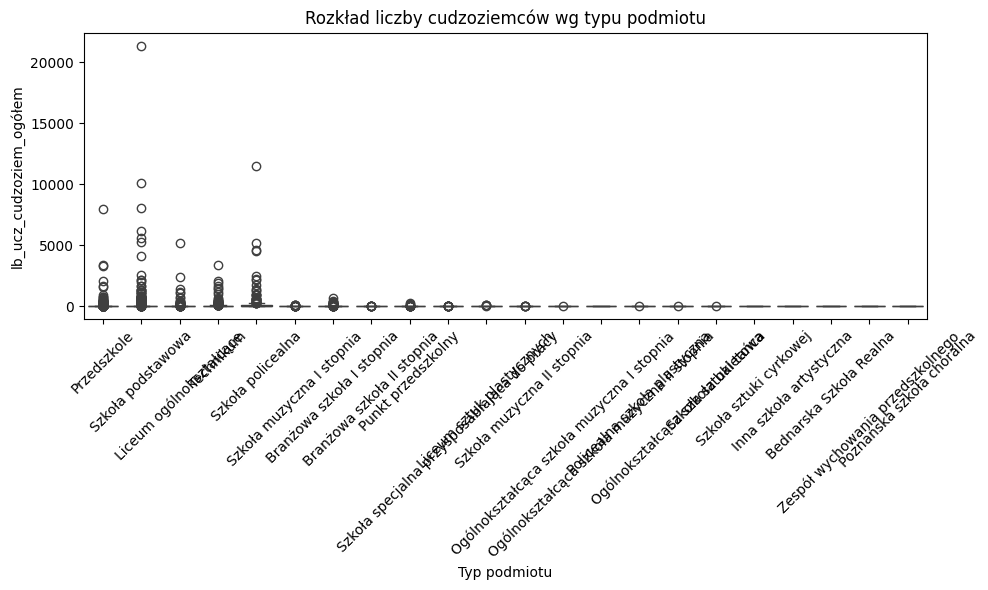

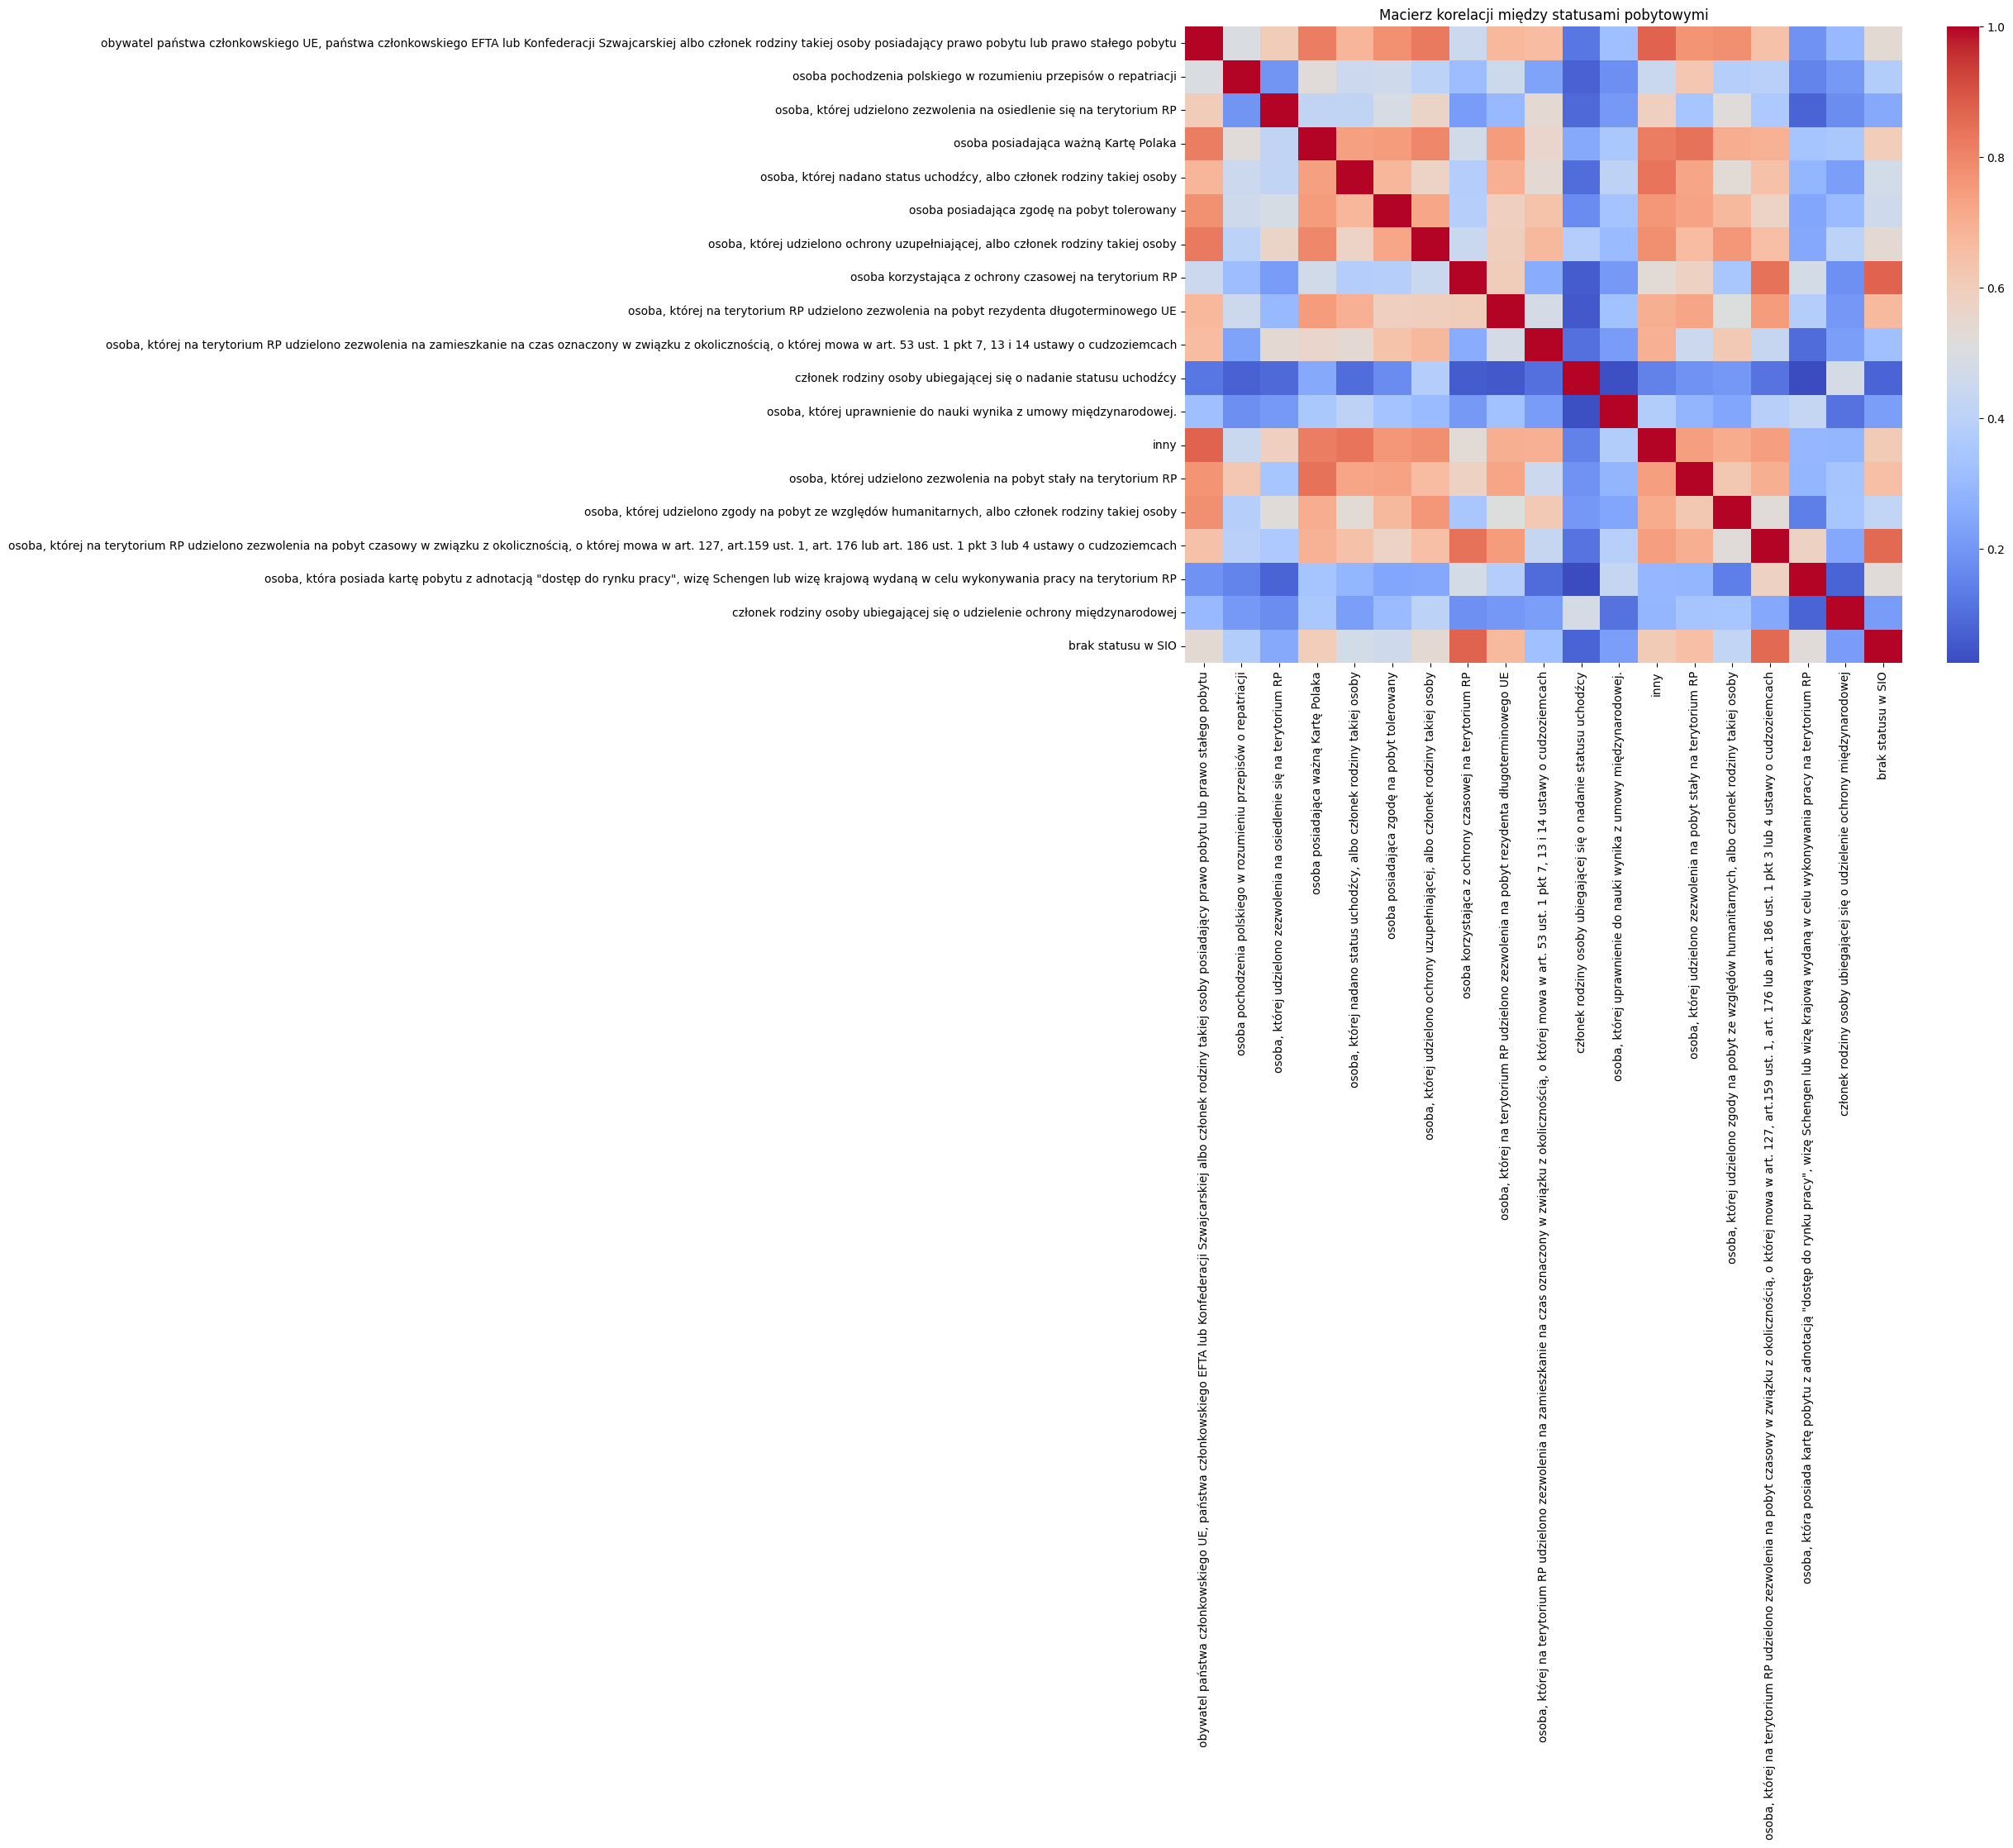

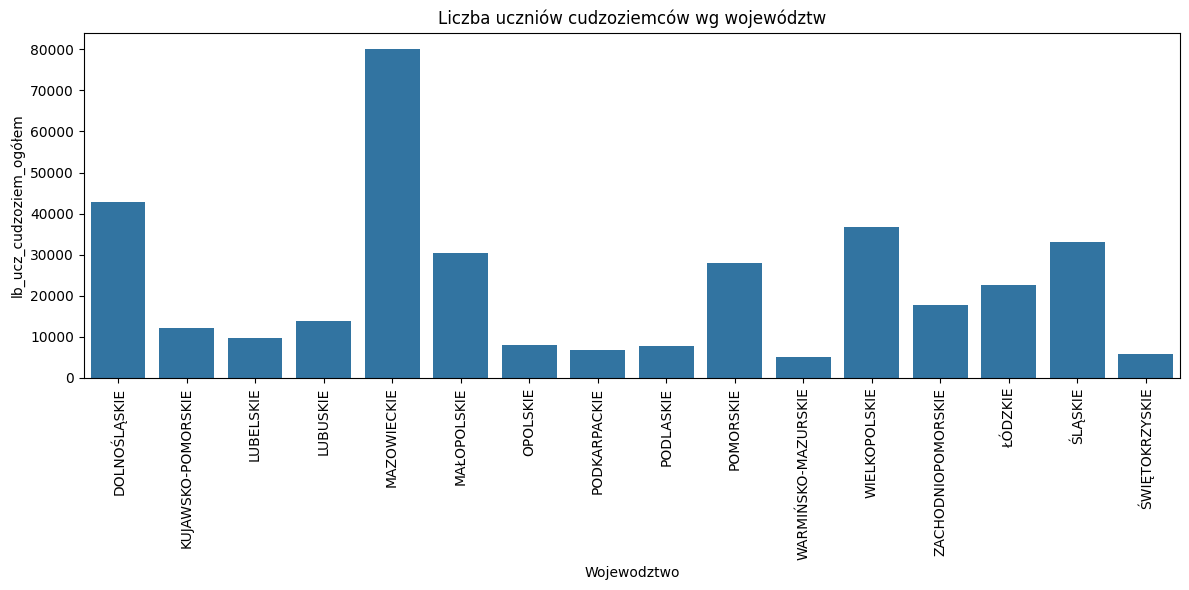

In [20]:
# Rozkład uczniów ogółem wg typu szkoły
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Typ podmiotu', y='lb_ucz_cudzoziem_ogółem')
plt.xticks(rotation=45)
plt.title('Rozkład liczby cudzoziemców wg typu podmiotu')
plt.tight_layout()
plt.show()

# Korelacje między kolumnami statusów
plt.figure(figsize=(14, 10))
corr = df[status_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Macierz korelacji między statusami pobytowymi')
plt.show()

# Suma uczniów cudzoziemców w województwach
plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby("Wojewodztwo")['lb_ucz_cudzoziem_ogółem'].sum().reset_index(),
            x='Wojewodztwo', y='lb_ucz_cudzoziem_ogółem')
plt.xticks(rotation=90)
plt.title("Liczba uczniów cudzoziemców wg województw")
plt.tight_layout()
plt.show()


In [21]:
# Zmienna target
target = 'lb_ucz_cudzoziem_ogółem'

# Wybrane cechy – bez technik ważności, na podstawie wiedzy domenowej
features = [
    'Typ podmiotu_kod', 'Typ obszaru_kod', 'Wojewodztwo_kod',
    'status_UE', 'status_pozostale'
]

# Przykładowe przygotowanie X i y
X = df[features]
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (7297, 5)
y shape: (7297,)
